In [13]:
# IMPORT LIBRARY & SETUP FOLDER

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings
import time

# Library Machine Learning & Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Konfigurasi
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# Membuat Struktur Folder Otomatis
folders = ['data', 'models', 'images', 'src']
for folder in folders:
    path = f'/content/{folder}'
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Folder dibuat: {path}")
    else:
        print(f"Folder sudah ada: {path}")

print("\n Setup Selesai! Siap memproses data Soybean.")

Folder sudah ada: /content/data
Folder sudah ada: /content/models
Folder sudah ada: /content/images
Folder sudah ada: /content/src

 Setup Selesai! Siap memproses data Soybean.


In [14]:
# LOAD DATA & CLEANING

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import os

# 1. Definisi Nama Kolom (Sesuai dokumentasi UCI Soybean)
col_names = [
    'class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
    'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth',
    'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
    'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging',
    'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay',
    'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit-spots',
    'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots'
]

# 2. Load Data
file_path = 'data/soybean-large.data'

# Cek apakah file ada, jika tidak coba path alternatif (root)
if not os.path.exists(file_path):
    print(f"File tidak ditemukan di {file_path}, mencoba path root...")
    file_path = '/content/soybean-large.data'

df = pd.read_csv(file_path, names=col_names, header=None)
print(f"Dataset Loaded. Ukuran Awal: {df.shape}")

# 3. Pengecekan Duplikat
print("\n Pengecekan Data Duplikat:")
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

if jumlah_duplikat > 0:
    print("Contoh data duplikat (Dipertahankan, tidak dihapus):")
    # Menampilkan baris yang duplikat
    print(df[df.duplicated(keep=False)].head())

# 4. Data Cleaning (Handling Missing Values)
# Ganti simbol '?' dengan NaN
df.replace('?', np.nan, inplace=True)

print(f"\nJumlah Missing Values (sebelum imputasi): {df.isnull().sum().sum()}")

# Imputasi (Isi data kosong dengan Modus/Nilai terbanyak)
# Strategi 'most_frequent' cocok untuk data kategori
imputer = SimpleImputer(strategy='most_frequent')
df_clean = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(f"Jumlah Missing Values (setelah imputasi): {df_clean.isnull().sum().sum()}")
print(" Data Cleaning Selesai.")
df_clean.head()

File tidak ditemukan di data/soybean-large.data, mencoba path root...
Dataset Loaded. Ukuran Awal: (307, 36)

 Pengecekan Data Duplikat:
Jumlah data duplikat: 4
Contoh data duplikat (Dipertahankan, tidak dihapus):
                   class date plant-stand precip temp hail crop-hist  \
70        brown-stem-rot    4           0      0    1    0         1   
71        brown-stem-rot    4           0      0    1    0         1   
115           brown-spot    1           1      2    1    0         2   
135           brown-spot    1           1      2    1    0         2   
213  alternarialeaf-spot    6           0      2    2    0         3   

    area-damaged severity seed-tmt  ... int-discolor sclerotia  fruit-pods  \
70             3        1        1  ...            1         0           0   
71             3        1        1  ...            1         0           0   
115            3        1        0  ...            0         0           0   
135            3        1        0  ...  

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


 Memulai Exploratory Data Analysis (EDA)...


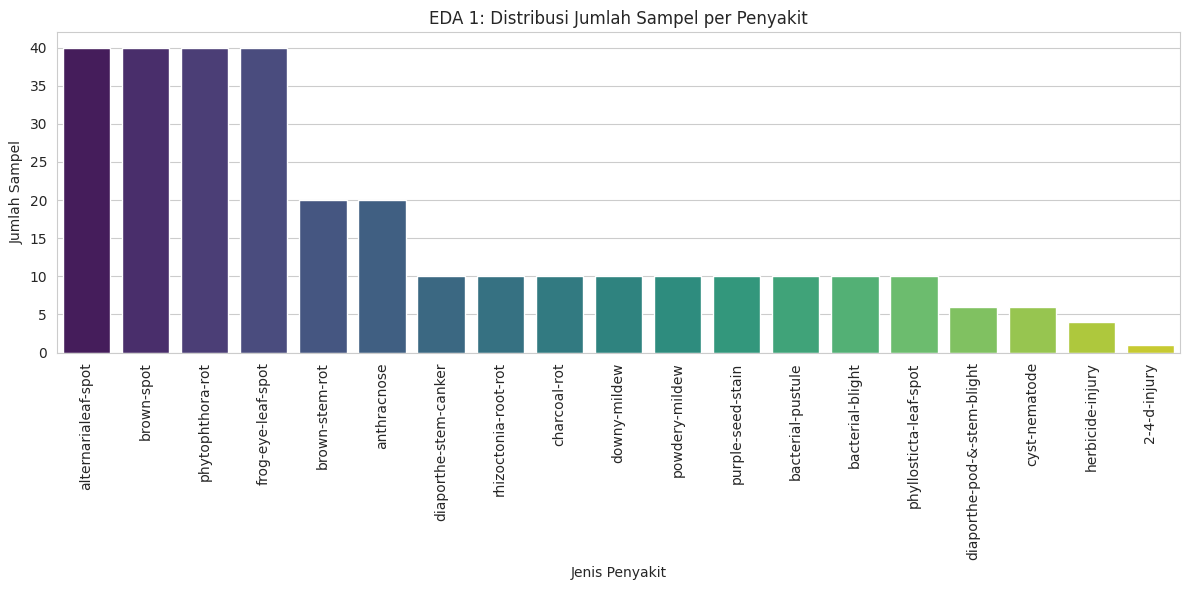

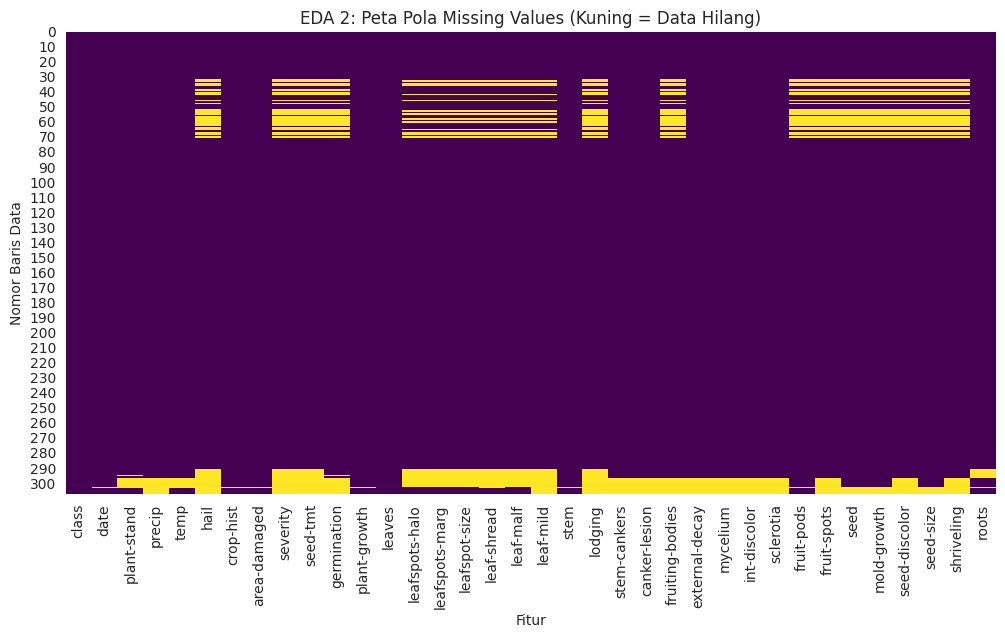

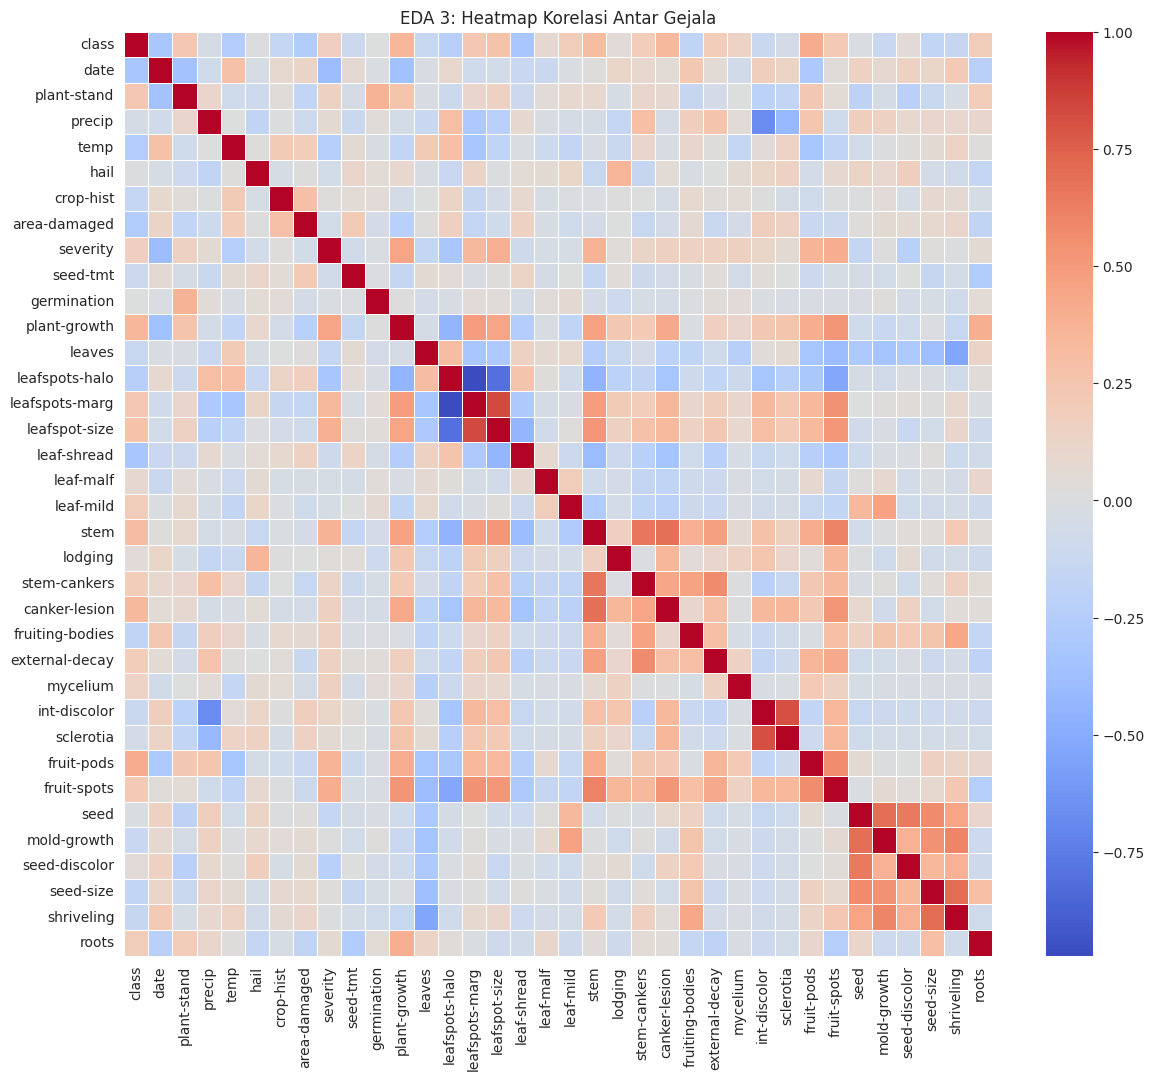

 3 Visualisasi EDA berhasil disimpan di folder 'images/'


In [15]:
# EDA (Exploratory Data Analysis)

import matplotlib.pyplot as plt
import seaborn as sns

print(" Memulai Exploratory Data Analysis (EDA)...")

# Pastikan folder images ada
if not os.path.exists('images'):
    os.makedirs('images')

# VISUALISASI 1: DISTRIBUSI KELAS TARGET
plt.figure(figsize=(12, 6))
class_counts = df_clean['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('EDA 1: Distribusi Jumlah Sampel per Penyakit')
plt.xlabel('Jenis Penyakit')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/eda_1_class_distribution.png')
plt.show()

# VISUALISASI 2: MISSING VALUES HEATMAP
# Menggunakan df asli (sebelum imputasi) untuk melihat pola '?'
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('EDA 2: Peta Pola Missing Values (Kuning = Data Hilang)')
plt.ylabel('Nomor Baris Data')
plt.xlabel('Fitur')
plt.savefig('images/eda_2_missing_values.png')
plt.show()

# VISUALISASI 3: KORELASI ANTAR FITUR
# Encode sementara untuk melihat korelasi angka
df_temp = df_clean.copy()
from sklearn.preprocessing import LabelEncoder
for col in df_temp.columns:
    df_temp[col] = LabelEncoder().fit_transform(df_temp[col])

plt.figure(figsize=(14, 12))
correlation = df_temp.corr()
sns.heatmap(correlation, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('EDA 3: Heatmap Korelasi Antar Gejala')
plt.savefig('images/eda_3_correlation.png')
plt.show()

print(" 3 Visualisasi EDA berhasil disimpan di folder 'images/'")

In [16]:
# PREPROCESSING & SPLITTING

# Pisahkan Fitur (X) dan Target (y)
X = df_clean.drop('class', axis=1)
y = df_clean['class']

# Encode Fitur & Target
X_encoded = X.copy()
label_encoders = {}

# Loop untuk encode semua kolom fitur
for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# Encode Target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Khusus Deep Learning: Target perlu One-Hot Encoding
y_train_dl = to_categorical(y_train)
y_test_dl = to_categorical(y_test)

print(f"Data Train: {X_train.shape}")
print(f"Data Test : {X_test.shape}")
print("Siap Masuk ke Modeling!")

Data Train: (245, 35)
Data Test : (62, 35)
Siap Masuk ke Modeling!


In [17]:
# TRAINING MODEL


# 1. MODEL BASELINE (Decision Tree)

print("Training Model Baseline (Decision Tree)...")
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
acc_base = baseline_model.score(X_test, y_test)


# 2. MODEL ADVANCED ML (Random Forest)
print("Training Model ML (Random Forest)...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
acc_rf = rf_model.score(X_test, y_test)


# 3. MODEL DEEP LEARNING (Neural Network)
print("Training Model Deep Learning (MLP)...")
model_dl = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_train_dl.shape[1], activation='softmax') # Output Layer
])

model_dl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training (History disimpan untuk Blok 5)
history = model_dl.fit(X_train, y_train_dl, epochs=50, batch_size=16, verbose=0, validation_data=(X_test, y_test_dl))
_, acc_dl = model_dl.evaluate(X_test, y_test_dl, verbose=0)

# OUTPUT HASIL & ARSITEKTUR
# 1. Hasil Akurasi Sementara
print(f"\n HASIL SEMENTARA:")
print(f"   - Baseline (DT)    : {acc_base*100:.2f}%")
print(f"   - Advanced (RF)    : {acc_rf*100:.2f}%")
print(f"   - Deep Learning    : {acc_dl*100:.2f}%")

# 2. Arsitektur Model (PENTING: Jangan Dihapus)
print("\n=== ARSITEKTUR MODEL (MODEL SUMMARY) ===")
model_dl.summary()

print("\n")

Training Model Baseline (Decision Tree)...
Training Model ML (Random Forest)...
Training Model Deep Learning (MLP)...

 HASIL SEMENTARA:
   - Baseline (DT)    : 90.32%
   - Advanced (RF)    : 91.94%
   - Deep Learning    : 83.87%

=== ARSITEKTUR MODEL (MODEL SUMMARY) ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 19)             │           627 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,035 (58.73 KB)

 Trainable params: 5,011 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,024 (39.16 KB)


DETAIL METRIK EVALUASI

 1 Classification Report: BASELINE (Decision Tree)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      0.88      0.88         8
           2       0.83      1.00      0.91         5
           3       0.75      0.75      0.75         4
           4       0.50      0.50      0.50         2
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       0.75      0.60      0.67         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         2
     

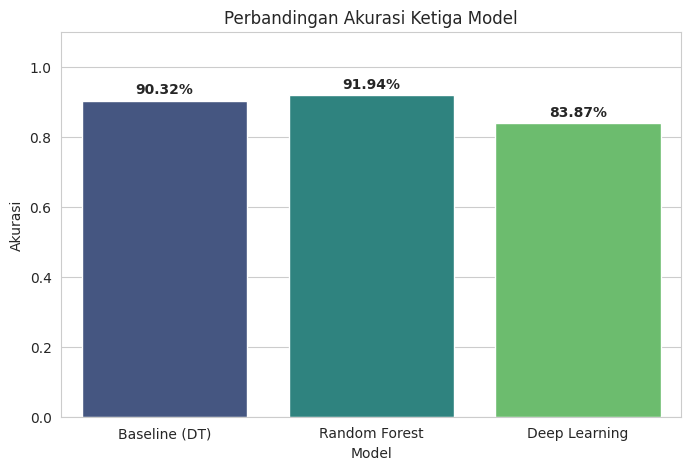

Gambar 2 (Pohon Keputusan) tersimpan.


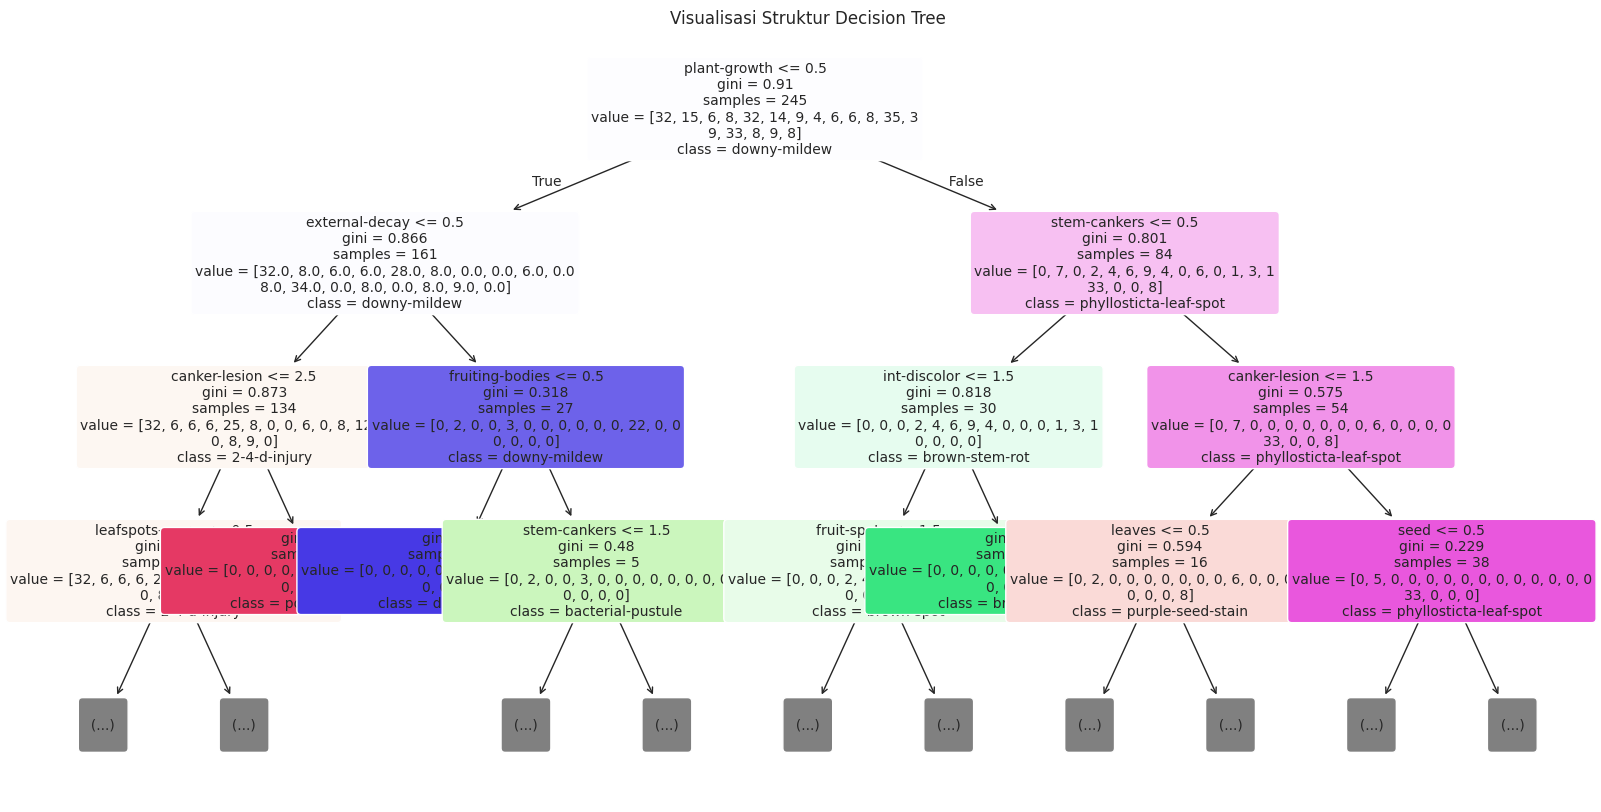

Gambar 2b (Matrix Baseline) tersimpan.


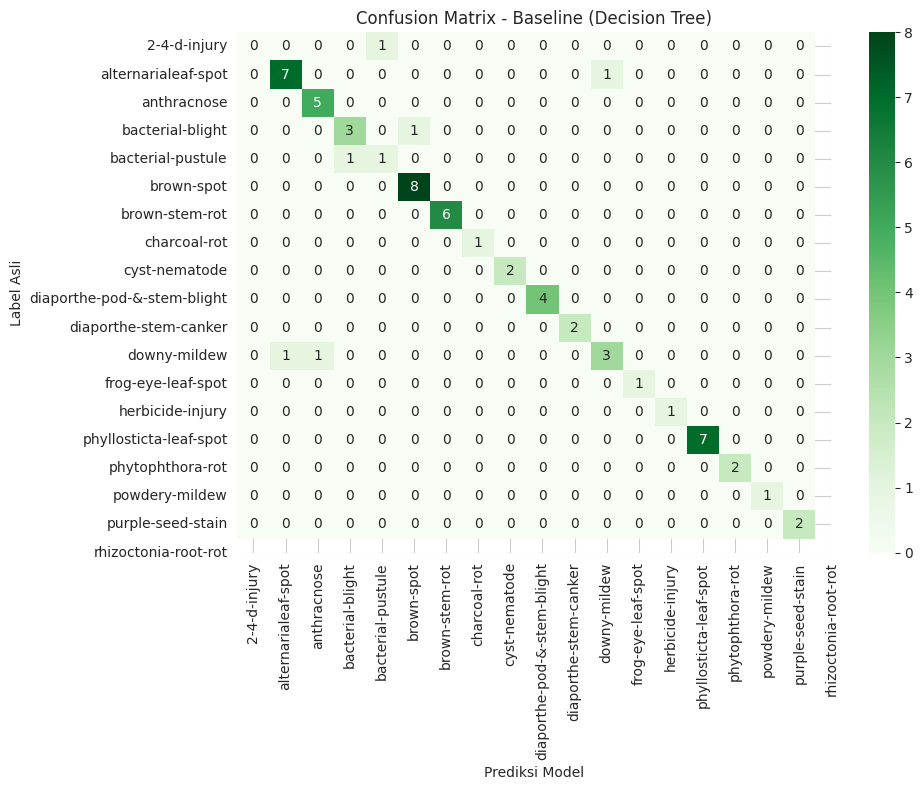

Gambar 3 (Training History) tersimpan.


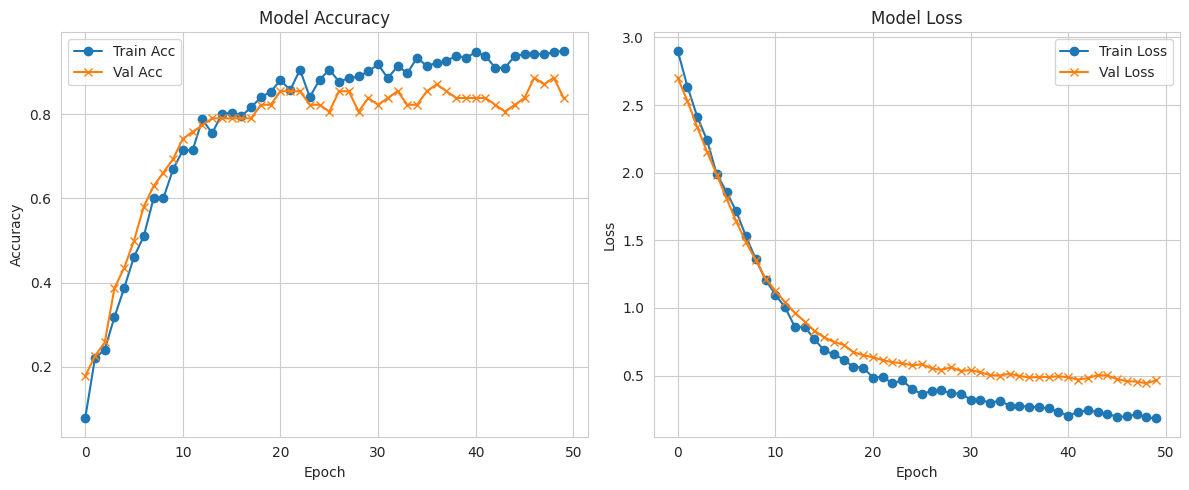

Gambar 4 (Matrix & Feature Importance) tersimpan.


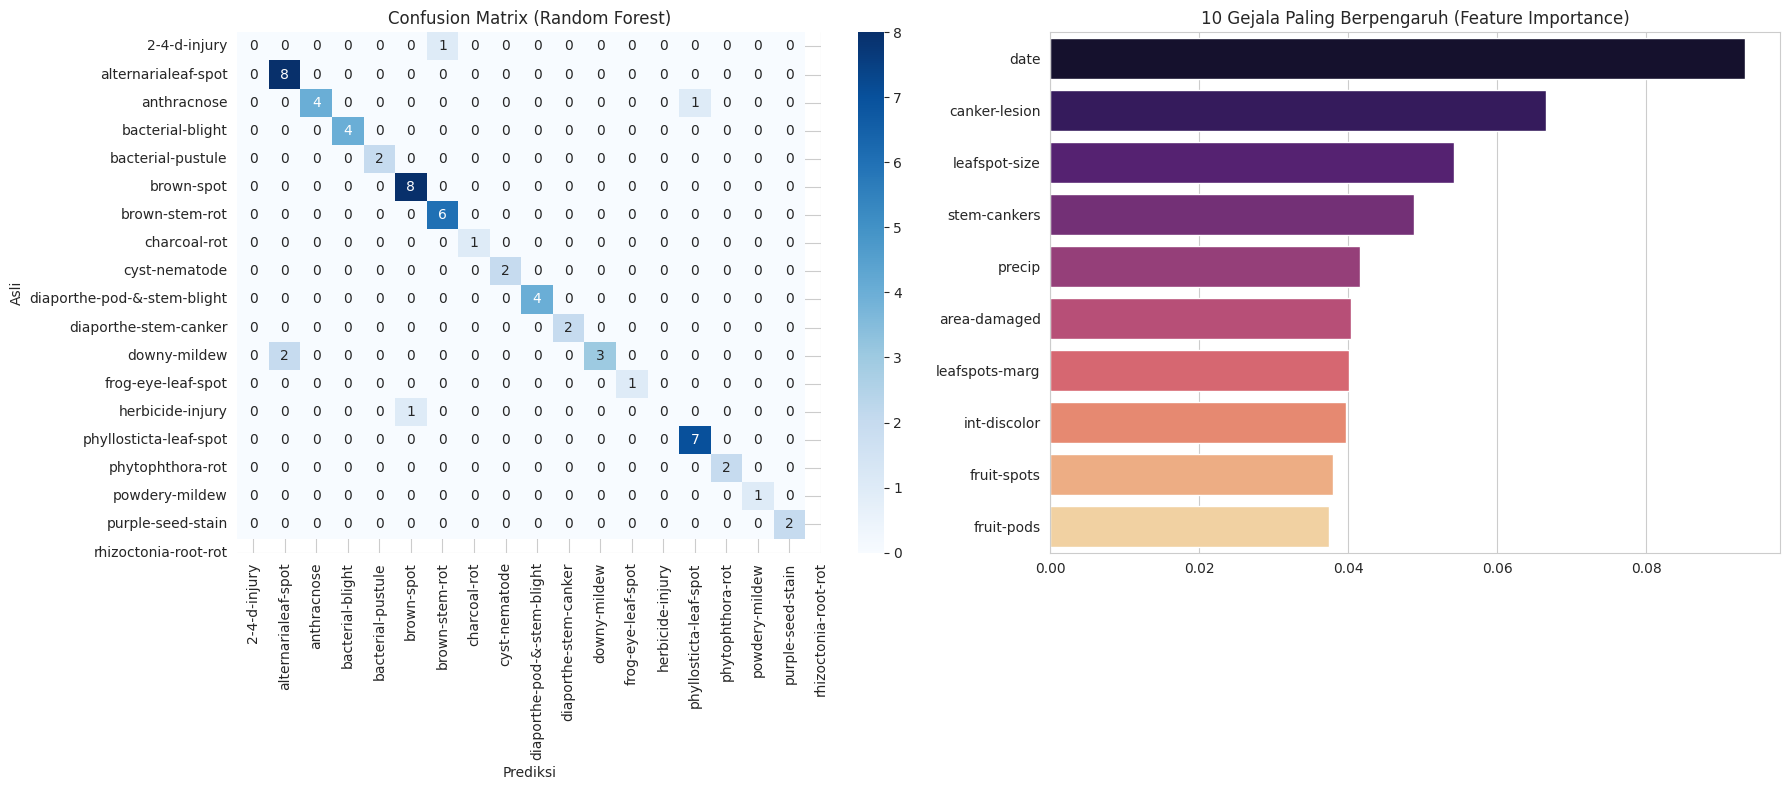

Gambar 5 (DL Confusion Matrix) tersimpan.


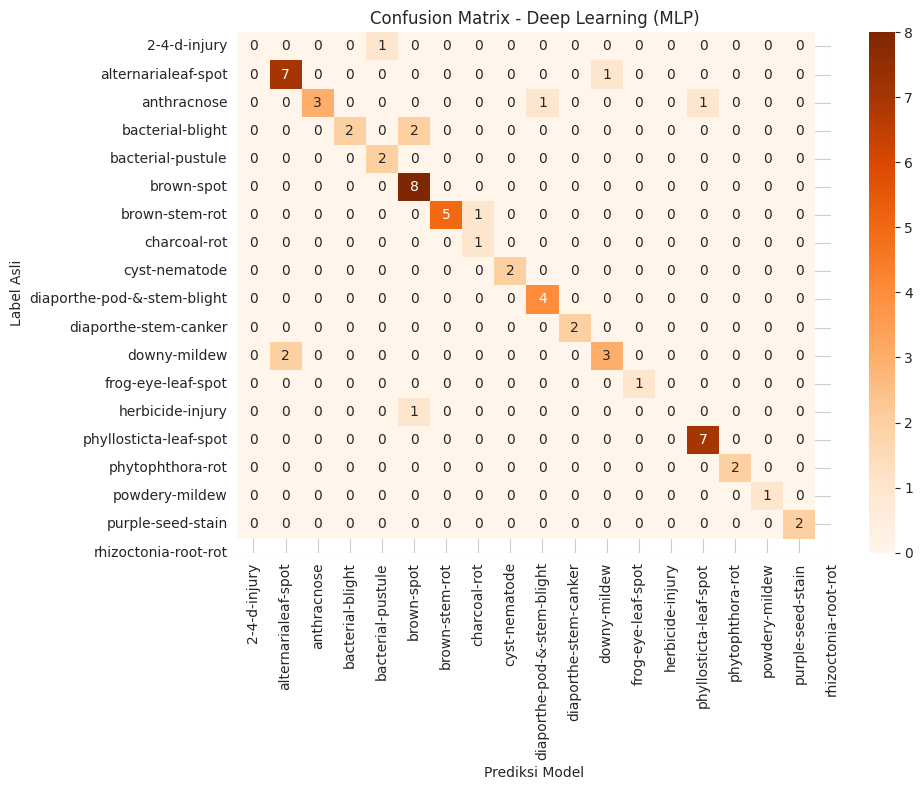


PREDIKSI DEEP LEARNING (SAMPEL)
 No. Data            Label Asli        Prediksi Model Status
       50   alternarialeaf-spot    frog-eye-leaf-spot  Salah
       56   alternarialeaf-spot   alternarialeaf-spot  Benar
        0           anthracnose      phytophthora-rot  Salah
       57    frog-eye-leaf-spot   alternarialeaf-spot  Salah
        5 diaporthe-stem-canker diaporthe-stem-canker  Benar
       48            brown-spot            brown-spot  Benar
       16   alternarialeaf-spot   alternarialeaf-spot  Benar
       12      phytophthora-rot      phytophthora-rot  Benar
       25     bacterial-pustule     bacterial-pustule  Benar
       59      bacterial-blight      bacterial-blight  Benar

SELESAI. Semua output visualisasi & tabel sudah siap.


In [18]:

# EVALUASI LENGKAP, VISUALISASI, DAN ANALISIS
# Setup Style Visualisasi
sns.set_style("whitegrid")

# MENAMPILKAN ANGKA METRIK (CLASSIFICATION REPORT)
print("\n" + "="*50)
print("DETAIL METRIK EVALUASI")
print("="*50)

# 1. Evaluasi Baseline (Decision Tree)
print("\n 1 Classification Report: BASELINE (Decision Tree)")
y_pred_dt = baseline_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

# 2. Evaluasi Advanced (Random Forest)
print("\n 2 Classification Report: ADVANCED (Random Forest)")
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# 3. Evaluasi Deep Learning (MLP)
print("\n 3 Classification Report: DEEP LEARNING")
# Hitung prediksi Deep Learning sekali saja untuk dipakai seterusnya
y_pred_prob = model_dl.predict(X_test, verbose=0)
y_pred_dl = np.argmax(y_pred_prob, axis=1)

# Asumsi y_test sudah dalam bentuk label angka
print(classification_report(y_test, y_pred_dl))


# BAGIAN B: GENERATE GAMBAR VISUALISASI

print("\n" + "="*50)
print("GENERATE GAMBAR VISUALISASI")
print("="*50)

# Gambar 1: Komparasi Akurasi
comparison = pd.DataFrame({
    'Model': ['Baseline (DT)', 'Random Forest', 'Deep Learning'],
    'Akurasi': [acc_base, acc_rf, acc_dl]
})
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Akurasi', data=comparison, palette='viridis')
plt.ylim(0, 1.1)
plt.title('Perbandingan Akurasi Ketiga Model')
for i, v in enumerate(comparison['Akurasi']):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center', fontweight='bold')
plt.savefig('/content/images/1_accuracy_comparison.png')
print("Gambar 1 (Komparasi Akurasi) tersimpan.")
plt.show()

# Gambar 2: Visualisasi Decision Tree (Pohon)
plt.figure(figsize=(20, 10))
plot_tree(baseline_model, feature_names=X.columns, class_names=list(le_target.classes_),
          filled=True, rounded=True, max_depth=3, fontsize=10)
plt.title("Visualisasi Struktur Decision Tree")
plt.savefig('/content/images/2_decision_tree_viz.png')
print("Gambar 2 (Pohon Keputusan) tersimpan.")
plt.show()


# Gambar 2b: Confusion Matrix Baseline (Decision Tree) - Agar lengkap
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Baseline (Decision Tree)')
plt.ylabel('Label Asli')
plt.xlabel('Prediksi Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/images/2b_dt_confusion_matrix.png')
print("Gambar 2b (Matrix Baseline) tersimpan.")
plt.show()


# Gambar 3: Training History (Deep Learning)
if 'history' in globals():
    plt.figure(figsize=(12, 5))

    # Plot Akurasi (Kiri)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Acc', marker='x')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss (Kanan)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('/content/images/3_deep_learning_history.png')
    print("Gambar 3 (Training History) tersimpan.")
    plt.show()

# Gambar 4: Analisis Detail Random Forest
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Confusion Matrix RF
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_, ax=axes[0])
axes[0].set_title('Confusion Matrix (Random Forest)')
axes[0].set_xlabel('Prediksi')
axes[0].set_ylabel('Asli')
axes[0].tick_params(axis='x', rotation=90)

# Feature Importance RF
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:10] # Top 10
sns.barplot(x=importances[indices], y=[X.columns[i] for i in indices], palette='magma', ax=axes[1])
axes[1].set_title('10 Gejala Paling Berpengaruh (Feature Importance)')

plt.tight_layout()
plt.savefig('/content/images/4_rf_detailed_analysis.png')
print("Gambar 4 (Matrix & Feature Importance) tersimpan.")
plt.show()

# Gambar 5: Confusion Matrix Deep Learning
cm_dl = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Deep Learning (MLP)')
plt.xlabel('Prediksi Model')
plt.ylabel('Label Asli')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/images/5_dl_confusion_matrix.png')
print("Gambar 5 (DL Confusion Matrix) tersimpan.")
plt.show()


# BAGIAN C: CONTOH PREDIKSI (TEST SET PREDICTIONS)

print("\n" + "="*50)
print("PREDIKSI DEEP LEARNING (SAMPEL)")
print("="*50)

# Kunci random agar hasil konsisten
np.random.seed(42)

# Ambil 10 sampel acak
sampel_indeks = np.random.choice(len(y_test), 10, replace=False)

# ### [TAMBAHAN BARU: Translate Angka ke Nama Penyakit] ###
# Kita ambil label asli (angka) dan prediksi (angka)
label_asli_angka = y_test[sampel_indeks]
prediksi_angka = y_pred_dl[sampel_indeks]

# Kita ubah jadi nama teks biar mudah dibaca manusia
label_asli_teks = le_target.inverse_transform(label_asli_angka)
prediksi_teks = le_target.inverse_transform(prediksi_angka)

sampel_df = pd.DataFrame({
    'No. Data': sampel_indeks,
    'Label Asli': label_asli_teks,
    'Prediksi Model': prediksi_teks,
})


# Tambah status benar/salah dengan icon
sampel_df['Status'] = sampel_df.apply(lambda x: 'Benar' if x['Label Asli'] == x['Prediksi Model'] else 'Salah', axis=1)

# Tampilkan tabel rapi tanpa index pandas
print(sampel_df.to_string(index=False))

print("\n" + "="*50)
print("SELESAI. Semua output visualisasi & tabel sudah siap.")


Tabel Perbandingan
                   Model  Accuracy  Precision  Recall  F1-Score  Inference Time (detik)         Training Time (Estimasi)
Baseline (Decision Tree)    0.9032     0.8875  0.9032    0.8937                  0.0181 Sangat Cepat kurang dari 1 detik
Advanced (Random Forest)    0.9194     0.8997  0.9194    0.9017                  0.0586        Cepat kurang dari 3 detik
     Deep Learning (MLP)    0.8387     0.8379  0.8387    0.8207                  0.1924     Sedang (kurang dari 1 menit)

 Gambar Visualisasi Perbandingan tersimpan: /content/images/7_3_model_comparison.png


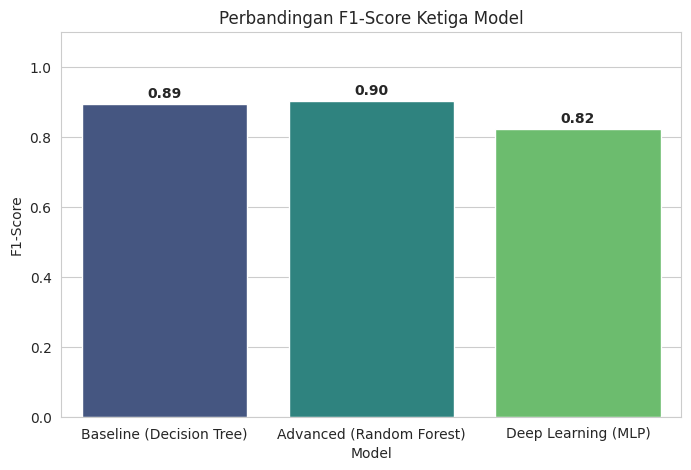

In [19]:

# 7.3 List untuk menyimpan hasil
results = []


# 1. EVALUASI BASELINE (Decision Tree)
start_time = time.time()
y_pred_dt = baseline_model.predict(X_test) # Prediksi ulang utk hitung waktu
end_time = time.time()
inf_time_dt = end_time - start_time

acc_dt = accuracy_score(y_test, y_pred_dt)
p_dt, r_dt, f1_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='weighted', zero_division=0)

results.append({
    "Model": "Baseline (Decision Tree)",
    "Accuracy": acc_dt,
    "Precision": p_dt,
    "Recall": r_dt,
    "F1-Score": f1_dt,
    "Inference Time (detik)": inf_time_dt,
    "Training Time (Estimasi)": "Sangat Cepat kurang dari 1 detik"
})

# 2. EVALUASI ADVANCED (Random Forest)
start_time = time.time()
y_pred_rf = rf_model.predict(X_test)
end_time = time.time()
inf_time_rf = end_time - start_time

acc_rf = accuracy_score(y_test, y_pred_rf)
p_rf, r_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted', zero_division=0)

results.append({
    "Model": "Advanced (Random Forest)",
    "Accuracy": acc_rf,
    "Precision": p_rf,
    "Recall": r_rf,
    "F1-Score": f1_rf,
    "Inference Time (detik)": inf_time_rf,
    "Training Time (Estimasi)": "Cepat kurang dari 3 detik"
})

# 3. EVALUASI DEEP LEARNING (MLP)
start_time = time.time()
# Perlu argmax karena output DL adalah probabilitas
y_pred_prob = model_dl.predict(X_test, verbose=0)
y_pred_dl = np.argmax(y_pred_prob, axis=1)
end_time = time.time()
inf_time_dl = end_time - start_time

acc_dl = accuracy_score(y_test, y_pred_dl)
p_dl, r_dl, f1_dl, _ = precision_recall_fscore_support(y_test, y_pred_dl, average='weighted', zero_division=0)

results.append({
    "Model": "Deep Learning (MLP)",
    "Accuracy": acc_dl,
    "Precision": p_dl,
    "Recall": r_dl,
    "F1-Score": f1_dl,
    "Inference Time (detik)": inf_time_dl,
    "Training Time (Estimasi)": "Sedang (kurang dari 1 menit)"
})

# MENAMPILKAN TABEL RANGKUMAN
df_73 = pd.DataFrame(results)

print("\n" + "="*60)
print("Tabel Perbandingan")
print("="*60)
print(df_73.round(4).to_string(index=False)) # 4 angka di belakang koma

# Visualisasi Bar Chart Perbandingan F1-Score
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='F1-Score', data=df_73, palette='viridis')
plt.title('Perbandingan F1-Score Ketiga Model')
plt.ylim(0, 1.1)
for i, v in enumerate(df_73['F1-Score']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.savefig('/content/images/7_3_model_comparison.png')
print("\n Gambar Visualisasi Perbandingan tersimpan: /content/images/7_3_model_comparison.png")
plt.show()

In [20]:
# BLOK 6: SIMPAN MODEL & DEMO PREDIKSI


print("Sedang menyimpan model ke folder '/content/models/'...")

# Simpan Model ML (Pickle)
joblib.dump(baseline_model, '/content/models/model_baseline.pkl')
joblib.dump(rf_model, '/content/models/model_rf.pkl')

# Simpan Model DL (Keras)
model_dl.save('/content/models/model_dl.keras')

# Simpan Encoders
joblib.dump(le_target, '/content/models/le_target.pkl')
joblib.dump(label_encoders, '/content/models/le_features.pkl')

print("Semua model berhasil disimpan!")

# DEMO PREDIKSI
print("\n --- DEMO PREDIKSI (Mencari Sampel Benar) ---")

# Konversi X_test ke numpy array dulu agar loop lebih cepat & aman
X_test_array = X_test.values

for i in range(len(X_test)):
    # Ambil data sampel (sekarang sudah aman karena array)
    sample = X_test_array[i].reshape(1, -1)
    true_label = y_test[i]

    # Prediksi
    pred_label = rf_model.predict(sample)[0]

    # Jika Benar, Tampilkan
    if pred_label == true_label:
        nama_asli = le_target.inverse_transform([true_label])[0]
        nama_pred = le_target.inverse_transform([pred_label])[0]

        print(f"Sampel Test Index ke-{i}:")
        print(f"  - Penyakit Asli  : {nama_asli}")
        print(f"  - Prediksi Model : {nama_pred}")
        print(f"  - Status         : BENAR")
        break

Sedang menyimpan model ke folder '/content/models/'...
Semua model berhasil disimpan!

 --- DEMO PREDIKSI (Mencari Sampel Benar) ---
Sampel Test Index ke-1:
  - Penyakit Asli  : phytophthora-rot
  - Prediksi Model : phytophthora-rot
  - Status         : BENAR


In [21]:
# MENGISI FOLDER SRC

import os

# 1. Pastikan folder src ada
src_path = '/content/src'
if not os.path.exists(src_path):
    os.makedirs(src_path)

# 2. Isi script python
# Script ini berisi logika training Random Forest yang sudah dibersihkan
script_content = """
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train_soybean_model():
    print("Memulai proses training dari script Python...")

    # 1. SETUP PATH
    # Asumsi script dijalankan dari root project
    dataset_path = '/content/data/soybean-large.data'
    model_save_path = '/content/models/model_rf_script.pkl'

    # Cek dataset
    if not os.path.exists(dataset_path):
        print(f"Error: Dataset tidak ditemukan di {dataset_path}")
        return

    # 2. LOAD DATA
    col_names = [
        'class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
        'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth',
        'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
        'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging',
        'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay',
        'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit-spots',
        'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots'
    ]

    print("Loading dataset...")
    df = pd.read_csv(dataset_path, names=col_names, header=None)

    # 3. CLEANING
    df.replace('?', np.nan, inplace=True)
    imputer = SimpleImputer(strategy='most_frequent')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # --- 4. ENCODING ---
    X = df_imputed.drop('class', axis=1)
    y = df_imputed['class']

    X_encoded = X.copy()
    for col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y)

    # 5. SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

    # 6. TRAINING (Random Forest)
    print("Training Random Forest Model...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluasi Singkat
    acc = rf_model.score(X_test, y_test)
    print(f"Training Selesai! Akurasi: {acc*100:.2f}%")

    # 7. SAVING
    if not os.path.exists('/content/models'):
        os.makedirs('/content/models')

    joblib.dump(rf_model, model_save_path)
    print(f"Model berhasil disimpan ke: {model_save_path}")

if __name__ == "__main__":
    train_soybean_model()
"""

# 3. Tulis konten ke file soybean_training.py
file_name = 'soybean_training.py'
full_path = os.path.join(src_path, file_name)

with open(full_path, 'w') as f:
    f.write(script_content)

print(f"Berhasil membuat file source code!")
print(f"Lokasi: {full_path}")
print("Silakan cek folder 'src' di panel kiri, file sudah tersedia.")

Berhasil membuat file source code!
Lokasi: /content/src/soybean_training.py
Silakan cek folder 'src' di panel kiri, file sudah tersedia.


In [22]:
# Cek versi library
import sys
import numpy
import pandas
import sklearn
import matplotlib
import seaborn
import tensorflow

print(f"Python Version: {sys.version.split()[0]}")
print(f"numpy=={numpy.__version__}")
print(f"pandas=={pandas.__version__}")
print(f"scikit-learn=={sklearn.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={seaborn.__version__}")
print(f"tensorflow=={tensorflow.__version__}")

Python Version: 3.12.12
numpy==2.0.2
pandas==2.2.2
scikit-learn==1.6.1
matplotlib==3.10.0
seaborn==0.13.2
tensorflow==2.19.0
